In [69]:
import pandas as pd
import os
import glob

In [67]:
def years_prep(years, summer):
    years['Host City, Country'] = years['Host City, Country'].str.split(',')
    years['Country'] = years['Host City, Country'].apply(lambda x: x[-1]) # Extracting host country name
    years.drop(['Olympiad', 'Host City, Country'], axis = 1, inplace = True)

    # Matching country name format in years and medals file
    years.loc[years['Country'] == " USA", 'Country'] = 'United States'
    years.loc[years['Country'] == " UK", 'Country'] = 'United Kingdom'
    years.loc[years['Country'] == " USSR", 'Country'] = 'Russia'

    years.loc[years['Year'] == 2021, 'Year'] = 2020 # Tokyo Olympics year postpone adjustment 
    years['Country'] = years['Country'].str.strip()
    if summer:
        years.drop([6, 12, 13], axis=0, inplace=True) # Olympics scheduled but not held
    return years
    
years_summer = pd.read_csv(r'data\olympics years - summer.csv')
years_summer = years_prep(years_summer, 1)

years_winter = pd.read_csv(r'data\olympics years - winter.csv')
years_winter = years_prep(years_winter, 0)

In [68]:
path_winter = r'\..\..\data\medals\winter'
path_summer = r'\..\..\data\medals\summer'


def produce_data(path, years):
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    data = pd.DataFrame(columns=['country', 'country_code', 'gold', 'silver', 'bronze', 'total'])
    for f in csv_files:
        df = pd.read_csv(f)
        df['Host'] = 0

        year = f[-8:-4]
        df['year'] = year
        host_country = years.loc[years['Year'] == int(year), 'Country']
        indx = df.index[df['country'] == host_country.item()]
        if(len(indx)>0):
            df.loc[indx[0], 'Host'] = 1
        data = pd.concat([data, df], ignore_index=True)
    return data

data_1 = produce_data(path_winter, years_winter)
data_2 = produce_data(path_summer, years_summer)
data = pd.concat([data_1, data_2], ignore_index=True)

In [45]:
# over the years country name change
data.loc[data['country'] == "Great Britain", 'country'] = 'United Kingdom'
data.loc[data['country'] == "Russian Federation", 'country'] = 'Russia'
data.loc[data['country'] == "Hong Kong, China", 'country'] = 'China'
data.loc[data['country'] == "People's Republic of China", 'country'] = 'China'
data.loc[data['country'] == "West Germany", 'country'] = 'Germany'
data.loc[data['country'] == "East Germany", 'country'] = 'Germany'
data.loc[data['country'] == "Soviet Union", 'country'] = 'Russia'
data.loc[data['country'] == "Australasia", 'country'] = 'Australia'
data.loc[data['country'] == "Chinese Taipei", 'country'] = 'China'

C:\Users\tanvi\AppData\Local\Temp/ipykernel_51424/895448546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[0.0] = df[0.0].round()
C:\Users\tanvi\AppData\Local\Temp/ipykernel_51424/895448546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[1.0] = df[1.0].round()


<AxesSubplot:xlabel='country'>

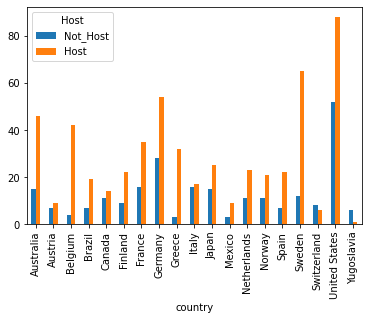

In [64]:
gkk = data.groupby(['country', 'Host'])['total'].agg(['sum', 'count', 'mean'])
gkk = gkk.reset_index()
medals_mean = gkk.pivot(index='country', columns='Host', values='mean')
df = medals_mean[medals_mean[1.0].notna()]
df[0.0] = df[0.0].round()
df[1.0] = df[1.0].round()
df = df.rename(columns={0.0: 'Not_Host', 1.0: 'Host'})
df.plot.bar()

C:\Users\tanvi\AppData\Local\Temp/ipykernel_51424/2961368954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[0.0] = df[0.0].round()
C:\Users\tanvi\AppData\Local\Temp/ipykernel_51424/2961368954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[1.0] = df[1.0].round()


<AxesSubplot:xlabel='year'>

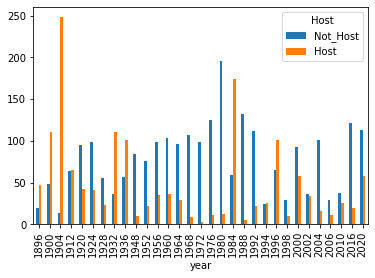

In [65]:
gkk = data.groupby(['year', 'Host'])['total'].agg(['sum', 'count', 'max'])
gkk = gkk.reset_index()
medals_mean = gkk.pivot(index='year', columns='Host', values='max')
df = medals_mean[medals_mean[1.0].notna()]

df[0.0] = df[0.0].round()
df[1.0] = df[1.0].round()
df = df.rename(columns={0.0: 'Not_Host', 1.0: 'Host'})
df.plot.bar()